   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

D

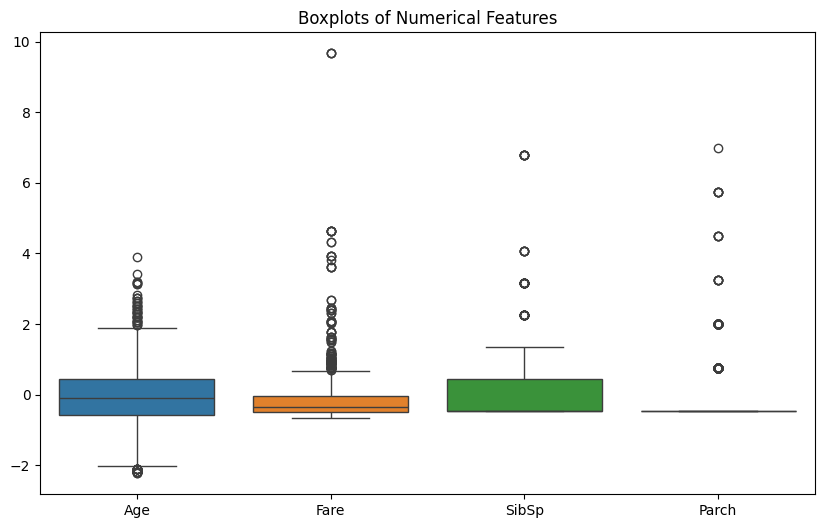

In [ ]:
#task1
#1
import pandas as pd

df=pd.read_csv("/content/Titanic-Dataset.csv")

# Basic info
print(df.head())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

#2
# Safely fill missing values (no chained assignment)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' if present
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# Confirm
print(df.isnull().sum())

#3
# Convert 'Sex' to numerical (binary)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked' if it exists
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

cols_to_drop = ['Name', 'Ticket']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

#4
from sklearn.preprocessing import StandardScaler

# List of numerical columns
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Initialize scaler
scaler = StandardScaler()

# Apply scaler
df[num_cols] = scaler.fit_transform(df[num_cols])

#5
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.title("Boxplots of Numerical Features")
plt.show()

# Remove outliers using IQR method (example on 'Fare')
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep rows within bounds
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]


In [ ]:
#task2
#1
import pandas as pd

# Summary statistics
summary = df.describe()
print(summary)

# Additional: Median for all columns
medians = df.median(numeric_only=True)
print("\nMedians:\n", medians)

#2
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

# Histograms
df[numeric_features].hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Boxplots
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

#3
# Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(df[numeric_features + ['Survived']], hue='Survived')
plt.suptitle('Pairplot of Features Colored by Survived', y=1.02)
plt.show()

#4
# Find passengers with extremely high fare
# Find passengers with extremely high fare
high_fare = df[df['Fare'] > 300]

# Print relevant information with available columns (as 'Ticket' and 'Name' are not in the dataset)
print("Passengers with very high fare:\n", high_fare[['PassengerId', 'Fare', 'Survived']])

#5
# Survival rate by class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Class:\n", survival_by_class)

survival_by_class.plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()


             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

KeyError: "None of [Index(['Age', 'Fare', 'SibSp', 'Parch', 'Pclass'], dtype='object')] are in the [columns]"

In [ ]:
#task3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data (replace this with your uploaded file)
df = pd.read_csv('house_price.csv')  # Or the uploaded file name

# Preview and clean
print(df.head())
df = df.dropna()

# Simple Linear Regression (e.g., 'SqFt' vs 'Price')
X = df[['SquareFeet']]  # use the actual column name here

y = df['Price']   # change to actual target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

# Plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('SqFt')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


KeyError: "None of [Index(['SquareFeet'], dtype='object')] are in the [columns]"

Confusion Matrix:
[[ 62   1]
 [  2 106]]
Precision: 0.99
Recall: 0.98
ROC-AUC Score: 0.98


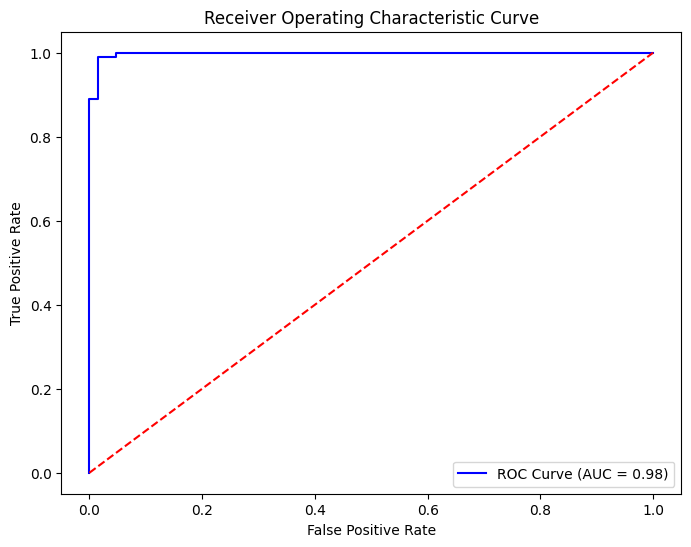

Confusion Matrix with threshold 0.3:
[[ 60   3]
 [  1 107]]


In [ ]:
#task4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset from scikit-learn
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize and fit the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
# Predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Change threshold from 0.5 to a lower value (e.g., 0.3)
threshold = 0.3
y_pred_threshold = (y_prob >= threshold).astype(int)

# Evaluate the new predictions
print(f"Confusion Matrix with threshold {threshold}:")
print(confusion_matrix(y_test, y_pred_threshold))







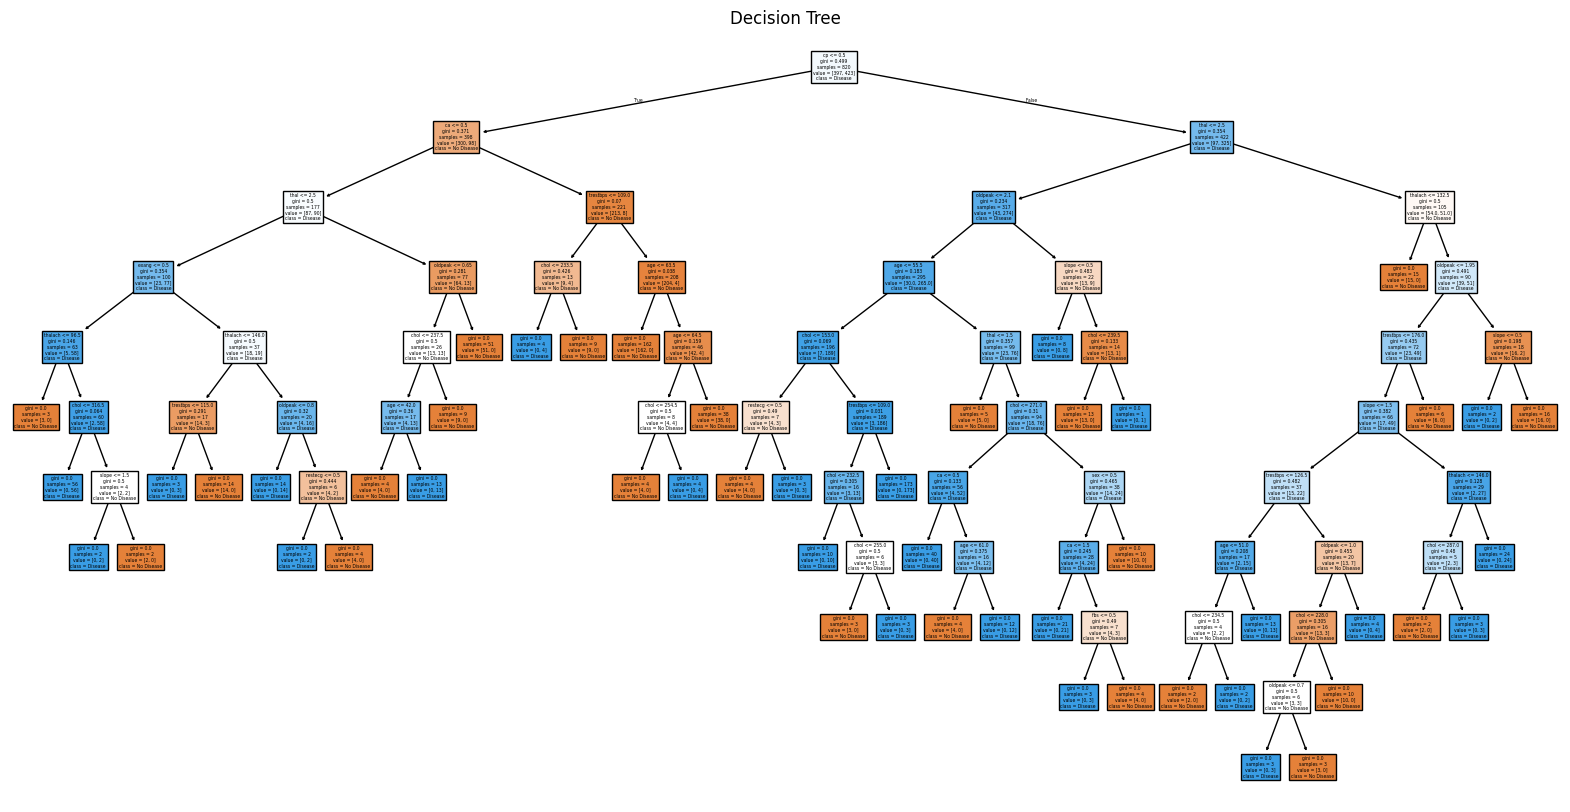

Random Forest - Train Accuracy: 1.00
Random Forest - Test Accuracy: 0.99


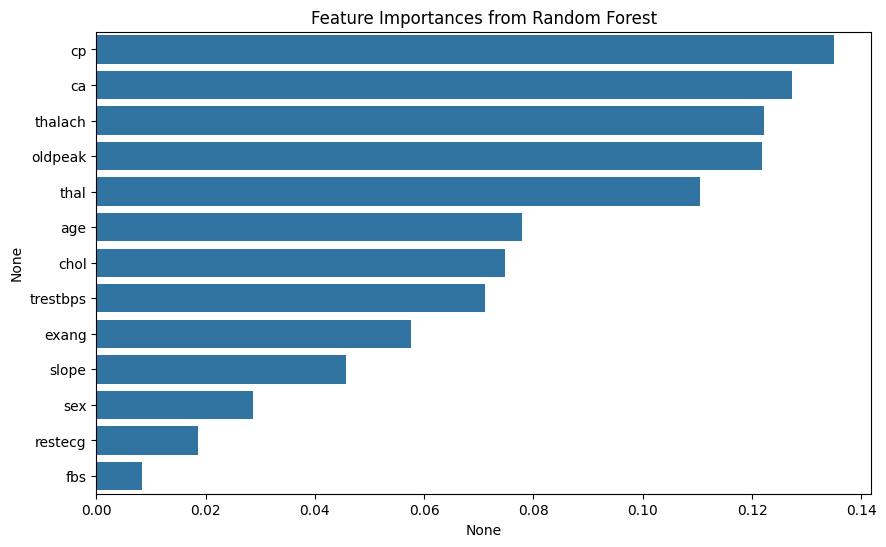

Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 1.00


In [1]:
#task 5
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/heart.csv')  # Make sure the file is in your working directory

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree")
plt.show()

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print(f"Random Forest - Train Accuracy: {rf.score(X_train, y_train):.2f}")
print(f"Random Forest - Test Accuracy: {rf.score(X_test, y_test):.2f}")

import seaborn as sns
import numpy as np

# Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances from Random Forest")
plt.show()

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")
